In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sklearn
import os
import numpy as np
from load_quilt_data import load_data
from pylab import *
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [26]:
node = 'pointwise_clusters_test'
typ = 'pointwiseclusters'

X, Y1, Y2, meta = load_data(node, typ)

In [5]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [22]:
def cut_data(X, Y, cluster_IDs):
    new_x = []
    new_y = []
    for x_n,y_n in zip(X[0], Y1[0]):
        if y_n in cluster_IDs:
            new_x.append(x_n)
            new_y.append(y_n)
    return(new_x, new_y)

In [67]:
# Plot the sensor data (segment against time) according to push/release and sensor stripe
def plot_sensor_data(x_data, y1, cluster_IDs):
    
    y1_a = np.unique(np.asarray(y1))
    n = len(y1_a)
    colors = ['b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r','b','g','c','r',
              'b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r']
    color = colors[:n]
    print(len(color))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111) 
    
    #subplots
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
    
    #plot according to push/release and which sensor
    for x, y in zip(x_data, y1):
        if cluster_IDs != 0:
            if y in cluster_IDs:
                if x[1] == 0:
                    if x[3] == 0:
                        ax1.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                    else:
                        ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color[y])
                else: 
                    if x[3] == 0:
                        ax2.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                    else:
                        ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color[y])
        else:
            if x[1] == 0:
                if x[3] == 0:
                    ax1.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                else:
                    ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color[y])
            else: 
                if x[3] == 0:
                    ax2.plot(x[0], x[2], 'o', marker='o', color = color[y], fillstyle = 'none')
                else:
                    ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color[y]) 
                    
    # turn off spines and labels of overlayed plot (for the shared axes)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    ax1.tick_params(labelcolor='w', top='off', bottom='off', right='off', labelbottom = 'off',  labelsize = 16)
    ax1.tick_params(labelcolor='black', left = 'on')
    ax1.set_ylim([0, 14])
    ax2.set_ylim([0, 14])
    ax2.tick_params(labelsize = 16)
    # Set common labels
    ax.set_xlabel('time[ms]', size = 16, labelpad=20)
    ax.set_ylabel('segment[1/3m]', size = 16, labelpad=20)

    #plt.suptitle('Prediction: '+str(wrong_y_pred)+' True value: '+str(y_true)+ ('\n0= Car in, 1= Car out, 2= Motorcycle, 3= Pedestrian'), va = 'bottom')
    plt.show()

In [60]:
# Compute clustering with MeanShift
def ms_clustering(x, b):

    # The following bandwidth can be automatically detected using
    #bandwidth = estimate_bandwidth(np.asarray(x), quantile=0.2)
    ms = MeanShift(bandwidth=b, bin_seeding=True)
    y_pred = ms.fit_predict(x)

    return(y_pred)


In [61]:
def sort_lists(list1, list2):
    list1, list2 = (list(t) for t in zip(*sorted(zip(list1, list2))))
    return(list2, list1)


In [62]:
def prepare_data(new_x, c, b):
    x_column = np.expand_dims(column(new_x, c),axis=1)
    y = ms_clustering(new_x,b)
    return(y)

In [73]:
y

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 21, 21, 21, 21, 21, 21, 21,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16,  1

22


C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


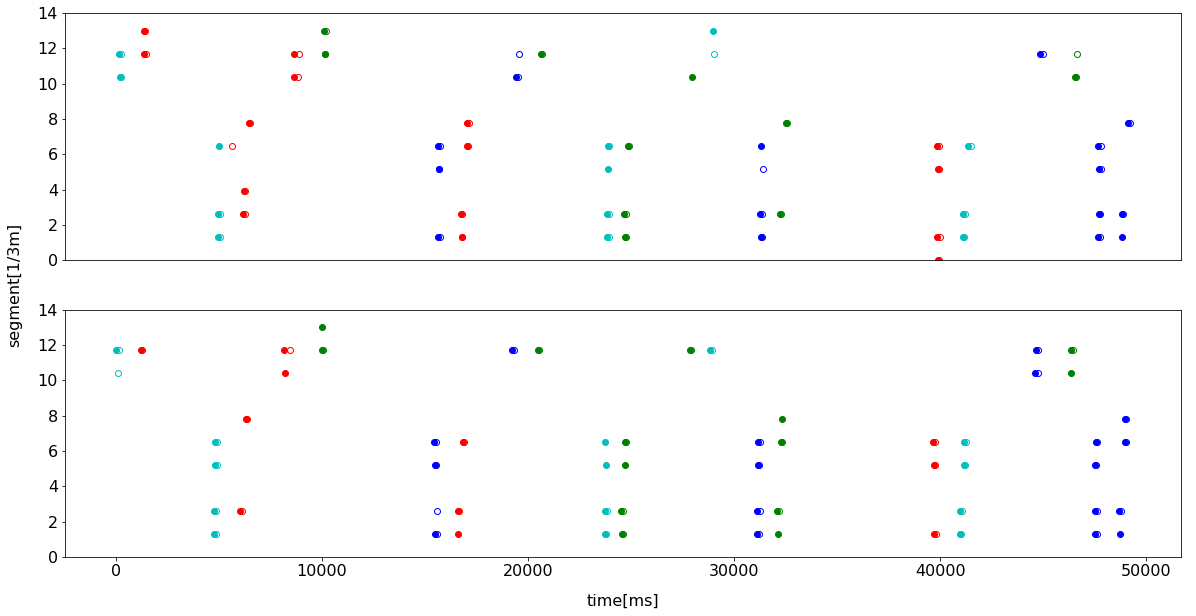

In [72]:
cluster_IDs = [8, 9, 10]
new_x= X[0] 
#new_x, new_y = cut_data(X, Y1, cluster_IDs)
c = 0
b = 450
y = ms_clustering(new_x,b)

#y = prepare_data(new_x, c, b)
cluster_IDs_ag = np.unique(y).tolist()
#x, y = sort_lists(y, new_x)# list sorting so that clusters are in the right color
plot_sensor_data(new_x, y, 0)

In [205]:
cluster_IDs_ag


[0, 1, 2, 3, 4, 5]

C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


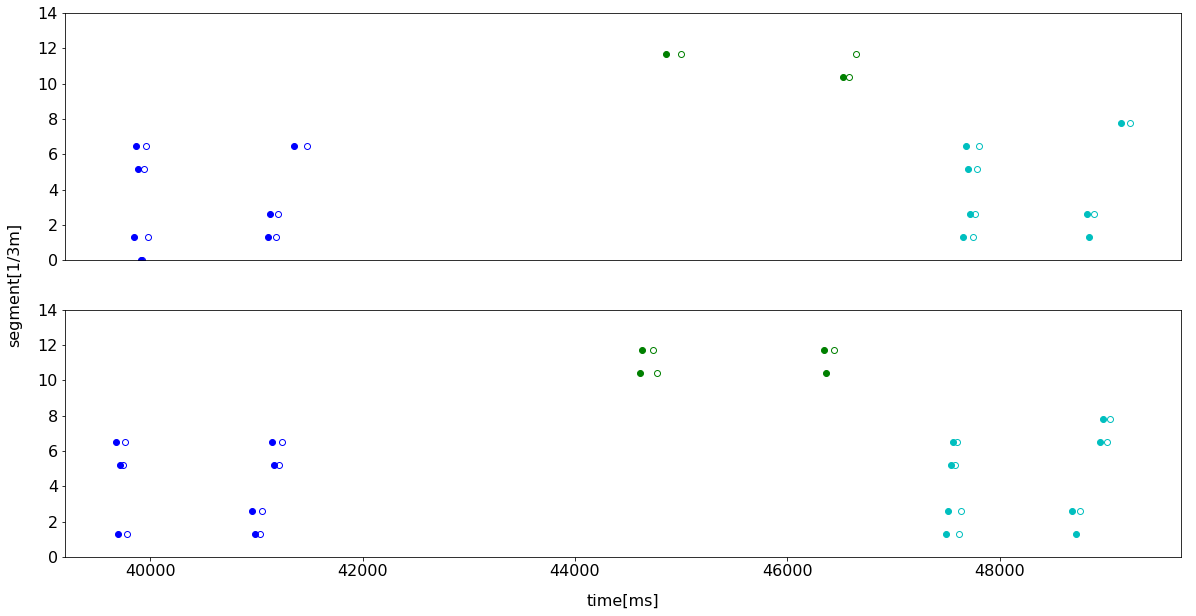

In [14]:
plot_sensor_data(X[0][len(new_x):],Y1[0][len(new_x):], cluster_IDs)

In [ ]:
#Look for unique clusters in foundclusters
unique_pos = []
unique_clusters = []
for cl_position, foundcluster in zip(cl_positions, foundclusters):
    if foundclusters.count(foundcluster) == 1:
        unique_pos.append(cl_position)
        unique_clusters.append(foundcluster)

In [310]:
#How long are clusters in Xc?
lens = []
for cluster, output in zip(Xc, Y2c):
    if output != 0:
        #print(len(cluster))
        lens.append(len(cluster))
lens.sort()
print(lens[1:1000])
print(min(lens))

[8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 

In [ ]:
    colors = cycle('bgcrmkw')

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111) 
    
    #subplots
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
    
    #plot according to push/release and which sensor
    i = 0
    for x, y in zip(x_data, y1):
        if i != 0:
            if y != y1[i-1]:
                color = next(colors)
        else:
            color = 'y'
            
        if cluster_IDs != 0:

            if y in cluster_IDs:

                if x[1] == 0:
                    if x[3] == 0:
                        ax1.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                    else:
                        ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color)
                else: 
                    if x[3] == 0:
                        ax2.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                    else:
                        ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color)
        else:
            if x[1] == 0:
                if x[3] == 0:
                    ax1.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                else:
                    ax1.plot(x[0], x[2], 'bo', marker = 'o', color = color)
            else: 
                if x[3] == 0:
                    ax2.plot(x[0], x[2], 'o', marker='o', color = color, fillstyle = 'none')
                else:
                    ax2.plot(x[0], x[2], 'bo', marker = 'o', color = color)
        i += 1